In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('mushrooms.csv')

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

<AxesSubplot: xlabel='class', ylabel='count'>

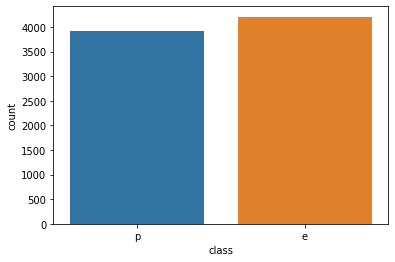

In [6]:
#Plotting countplot for class column
sns.countplot(x ='class', data = df)

Data is balanced

In [7]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
#Split the dataset into dependent(X) and Independent(Y) datasets
X=df.drop(labels=['class'], axis=1)
Y=df['class']

In [7]:
#Spliting the data into trainning and test dateset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

X_train.shape, Y_train.shape

((6499, 22), (6499,))

In [10]:
#X_train = pd.get_dummies(data=X_train, columns=['bruises','gill-attachment','gill-spacing','gill-size','stalk-shape'],drop_first=True)
#X_test = pd.get_dummies(data=X_test, columns=['bruises','gill-attachment','gill-spacing','gill-size','stalk-shape'],drop_first=True)
#Y_train = pd.get_dummies(data=Y_train, drop_first=True)
#Y_test = pd.get_dummies(data=Y_test, drop_first=True)

In [330]:
#Finding constant columns
static_col = set()
for col in X_train.columns:
    if len(X_train[col].unique())==1:
        static_col.add(col)
static_col

{'veil-type'}

In [8]:
#Dropping veil-type column since it is static
X_train.drop(['veil-type'], axis=1, inplace=True)
X_test.drop(['veil-type'], axis=1, inplace=True)

In [9]:
X_train['class_p']=Y_train

In [90]:
X_train

,cap-shape,cap-surface,cap-color,bruises,pleasant_odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class_p
7434,k,s,g,f,-1,f,w,b,p,e,?,s,s,w,w,w,2,p,w,s,g,e
7725,x,f,w,f,-1,f,w,b,g,e,?,s,s,w,w,w,2,p,w,n,g,e
783,x,s,w,t,1,f,c,b,n,e,c,s,s,w,w,w,1,p,k,s,m,e
1928,f,s,w,f,-1,f,w,b,h,t,e,s,f,w,w,w,1,e,k,s,g,e
7466,k,y,e,f,0,f,c,n,b,t,?,s,k,w,p,w,1,e,w,v,l,p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,x,y,e,t,-1,f,c,b,e,e,?,s,s,e,e,w,2,e,w,c,w,e
3264,x,f,g,f,0,f,c,b,h,e,b,k,k,p,n,w,1,l,h,y,p,p
1653,x,s,g,f,-1,f,w,b,h,t,e,f,s,w,w,w,1,e,n,s,g,e
2607,f,f,n,t,-1,f,c,b,n,t,b,s,s,g,g,w,1,p,n,v,d,e


In [15]:
X_train['ring-number'].unique()

array(['t', 'o', 'n'], dtype=object)

In [10]:
ring_number = {'n':0,
              'o':1,
              't':2}
X_train['ring-number'] = X_train['ring-number'].map(ring_number)
X_test['ring-number'] = X_test['ring-number'].map(ring_number)

<AxesSubplot: xlabel='stalk-shape_t', ylabel='count'>

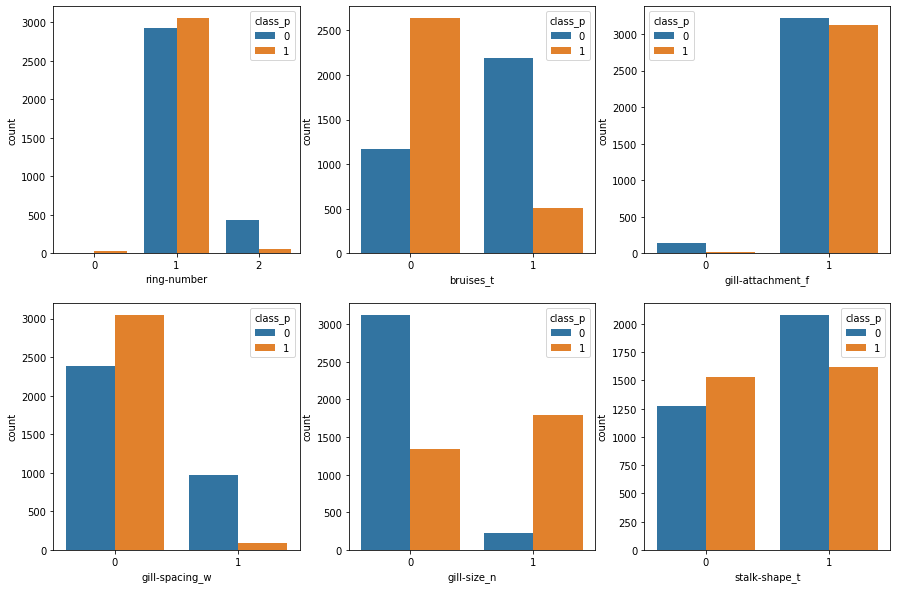

In [18]:
#Plotting relations for these columns
f, axes = plt.subplots(2, 3, figsize=(15,10))
sns.countplot(data=X_train, x="ring-number", hue="class_p", ax=axes[0,0])
sns.countplot(data=X_train, x="bruises_t", hue="class_p", ax=axes[0,1])
sns.countplot(data=X_train, x="gill-attachment_f", hue="class_p", ax=axes[0,2])
sns.countplot(data=X_train, x="gill-spacing_w", hue="class_p", ax=axes[1,0])
sns.countplot(data=X_train, x="gill-size_n", hue="class_p", ax=axes[1,1])
sns.countplot(data=X_train, x="stalk-shape_t", hue="class_p", ax=axes[1,2])

<AxesSubplot: xlabel='spore-print-color', ylabel='count'>

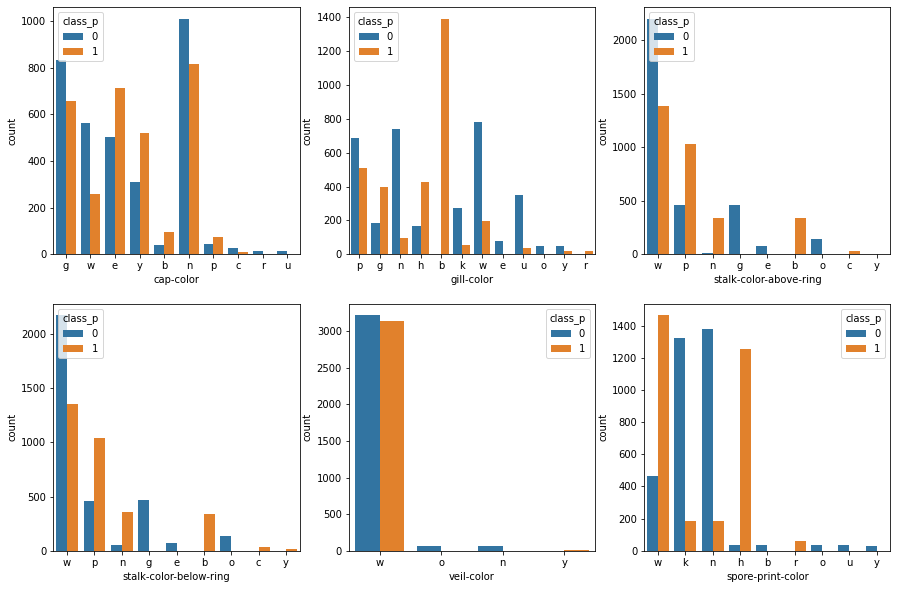

In [19]:
#Plotting relations for color columns
f, axes = plt.subplots(2, 3, figsize=(15,10))
sns.countplot(data=X_train, x="cap-color", hue="class_p", ax=axes[0,0])
sns.countplot(data=X_train, x="gill-color", hue="class_p", ax=axes[0,1])
sns.countplot(data=X_train, x="stalk-color-above-ring", hue="class_p", ax=axes[0,2])
sns.countplot(data=X_train, x="stalk-color-below-ring", hue="class_p", ax=axes[1,0])
sns.countplot(data=X_train, x="veil-color", hue="class_p", ax=axes[1,1])
sns.countplot(data=X_train, x="spore-print-color", hue="class_p", ax=axes[1,2])

In [20]:
#X_train = pd.get_dummies(data=X_train, columns=['cap-color','gill-color','stalk-color-above-ring','stalk-color-below-ring','veil-color','spore-print-color'],drop_first=True)
#X_test = pd.get_dummies(data=X_test, columns=['cap-color','gill-color','stalk-color-above-ring','stalk-color-below-ring','veil-color','spore-print-color'],drop_first=True)

<AxesSubplot: xlabel='stalk-surface-below-ring', ylabel='count'>

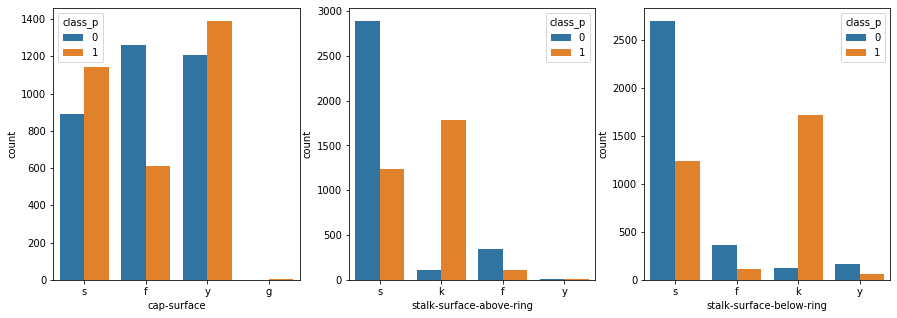

In [21]:
#Plotting relations for surface columns
f, axes = plt.subplots(1, 3, figsize=(15,5))
sns.countplot(data=X_train, x="cap-surface", hue="class_p", ax=axes[0])
sns.countplot(data=X_train, x="stalk-surface-above-ring", hue="class_p", ax=axes[1])
sns.countplot(data=X_train, x="stalk-surface-below-ring", hue="class_p", ax=axes[2])

In [23]:
#X_train = pd.get_dummies(data=X_train, columns=['cap-surface','stalk-surface-above-ring','stalk-surface-below-ring'],drop_first=True)
#X_test = pd.get_dummies(data=X_test, columns=['cap-surface','stalk-surface-above-ring','stalk-surface-below-ring'],drop_first=True)

In [25]:
#X_train = pd.get_dummies(data=X_train, columns=['cap-shape','ring-type','population','habitat'],drop_first=True)
#X_test = pd.get_dummies(data=X_test, columns=['cap-shape','ring-type','population','habitat'],drop_first=True)

<AxesSubplot: xlabel='odor', ylabel='count'>

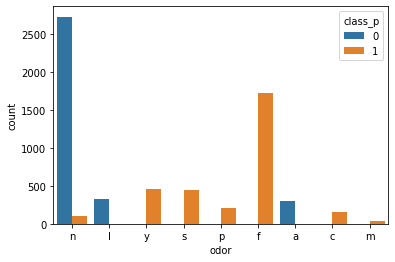

In [28]:
sns.countplot(data=X_train, x="odor", hue="class_p")

In [29]:
X_train.groupby('odor')['class_p'].value_counts()

odor  class_p
a     0           299
c     1           154
f     1          1730
l     0           323
m     1            31
n     0          2734
      1           101
p     1           213
s     1           451
y     1           463
Name: class_p, dtype: int64

In [30]:
X_train['odor'].value_counts()

n    2835
f    1730
y     463
s     451
l     323
a     299
p     213
c     154
m      31
Name: odor, dtype: int64

According to this, mushrooms with pleasant odors - almond, anise are edible and mushrooms with unpleasant odors are poisonous

But there is a large portion which have odor = None, this may be because of missing data

In [11]:
#Converting odor feature in numerical format
X_train.rename(columns={"odor": "pleasant_odor"}, inplace= True)

#Assigned -1 for missing data, will impute it later
conditions = [((X_train['pleasant_odor']=="a") | (X_train['pleasant_odor']=="l")),
              ((X_train['pleasant_odor']!="a") & (X_train['pleasant_odor']!="l") & (X_train['pleasant_odor']!="n")),
                (X_train['pleasant_odor']=="n") ]
X_train['pleasant_odor']=np.select(conditions, [1,0,2])

In [12]:
#Converting odor feature in numerical format
X_test.rename(columns={"odor": "pleasant_odor"}, inplace= True)

#Assigned -1 for missing data, will impute it later
conditions = [((X_test['pleasant_odor']=="a") | (X_test['pleasant_odor']=="l")),
              ((X_test['pleasant_odor']!="a") & (X_test['pleasant_odor']!="l") & (X_test['pleasant_odor']!="n")),
                (X_test['pleasant_odor']=="n") ]
X_test['pleasant_odor']=np.select(conditions, [1,0,2])

<AxesSubplot: xlabel='pleasant_odor', ylabel='count'>

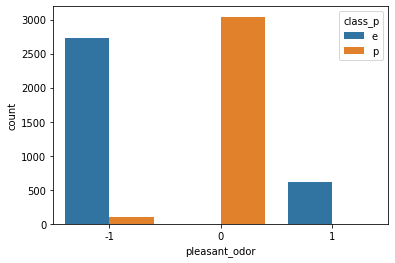

In [89]:
sns.countplot(data=X_train, x="pleasant_odor", hue="class_p")

In [11]:
X_train['pleasant_odor'].value_counts()

0    3042
2    2835
1     622
Name: pleasant_odor, dtype: int64

## Missing values to be filled

In [17]:
X_train['odor_Missing'] = np.where(X_train['pleasant_odor']==-1, 1,0)

In [19]:
X_train['pleasant_odor_Freq_cat'] = X_train['pleasant_odor'] 
X_train['pleasant_odor_Freq_cat'] = X_train['pleasant_odor_Freq_cat'].replace(['-1'], 0)

In [ ]:
from sklearn.impute import KNNImputer
knnimputer = KNNImputer(n_neighbors=3)
knnimputer.fit_transform(X_train)

In [103]:
from sklearn.impute import IterativeImputer
iteimputer = IterativeImputer()
iteimputer.fit_transform(X_train)

In [13]:
#X_train['stalk-root'] = np.where(X_train['stalk-root']=='?',-1)
X_train['stalk-root']=X_train['stalk-root'].replace('?','m')

In [14]:
X_test['stalk-root']=X_test['stalk-root'].replace('?','m')

In [15]:
X_train.drop(['class_p'], axis=1, inplace=True)

In [15]:
X_test

,cap-shape,cap-surface,cap-color,bruises,pleasant_odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
380,x,y,n,t,0,f,c,n,p,e,e,s,s,w,w,w,1,p,k,s,u
3641,f,y,g,t,2,f,c,b,p,t,b,s,s,g,g,w,1,p,k,y,d
273,x,y,y,t,1,f,c,b,k,e,c,s,s,w,w,w,1,p,n,n,m
1029,x,s,w,f,2,f,w,b,k,t,e,s,s,w,w,w,1,e,k,a,g
684,x,f,n,t,2,f,c,b,p,t,b,s,s,p,w,w,1,p,n,v,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,f,y,n,t,2,f,c,b,p,t,b,s,s,g,g,w,1,p,k,v,d
1643,f,f,w,f,2,f,w,b,p,t,e,f,s,w,w,w,1,e,k,a,g
6494,f,y,e,f,0,f,c,n,b,t,m,s,k,p,w,w,1,e,w,v,p
6,b,s,w,t,1,f,c,b,g,e,c,s,s,w,w,w,1,p,k,n,m


In [44]:
#X_train = pd.get_dummies(data=X_train, columns=['stalk-root'],drop_first=True)
#X_test = pd.get_dummies(data=X_test, columns=['stalk-root'],drop_first=True)

## One hot encoding

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
X_train_toenc=X_train.drop(labels=['pleasant_odor','ring-number'], axis=1).copy()
X_test_toenc=X_test.drop(labels=['pleasant_odor','ring-number'], axis=1).copy()

In [18]:
X_test_toenc

,cap-shape,cap-surface,cap-color,bruises,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-type,spore-print-color,population,habitat
380,x,y,n,t,f,c,n,p,e,e,s,s,w,w,w,p,k,s,u
3641,f,y,g,t,f,c,b,p,t,b,s,s,g,g,w,p,k,y,d
273,x,y,y,t,f,c,b,k,e,c,s,s,w,w,w,p,n,n,m
1029,x,s,w,f,f,w,b,k,t,e,s,s,w,w,w,e,k,a,g
684,x,f,n,t,f,c,b,p,t,b,s,s,p,w,w,p,n,v,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,f,y,n,t,f,c,b,p,t,b,s,s,g,g,w,p,k,v,d
1643,f,f,w,f,f,w,b,p,t,e,f,s,w,w,w,e,k,a,g
6494,f,y,e,f,f,c,n,b,t,m,s,k,p,w,w,e,w,v,p
6,b,s,w,t,f,c,b,g,e,c,s,s,w,w,w,p,k,n,m


In [19]:
X_train_toenc.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'gill-attachment',
       'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [20]:
enc = OneHotEncoder(drop='first',handle_unknown='ignore').fit(X_train_toenc)
enc.categories_

[array(['b', 'c', 'f', 'k', 's', 'x'], dtype=object),
 array(['f', 'g', 's', 'y'], dtype=object),
 array(['b', 'c', 'e', 'g', 'n', 'p', 'r', 'u', 'w', 'y'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['a', 'f'], dtype=object),
 array(['c', 'w'], dtype=object),
 array(['b', 'n'], dtype=object),
 array(['b', 'e', 'g', 'h', 'k', 'n', 'o', 'p', 'r', 'u', 'w', 'y'],
       dtype=object),
 array(['e', 't'], dtype=object),
 array(['b', 'c', 'e', 'm', 'r'], dtype=object),
 array(['f', 'k', 's', 'y'], dtype=object),
 array(['f', 'k', 's', 'y'], dtype=object),
 array(['b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y'], dtype=object),
 array(['b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y'], dtype=object),
 array(['n', 'o', 'w', 'y'], dtype=object),
 array(['e', 'f', 'l', 'n', 'p'], dtype=object),
 array(['b', 'h', 'k', 'n', 'o', 'r', 'u', 'w', 'y'], dtype=object),
 array(['a', 'c', 'n', 's', 'v', 'y'], dtype=object),
 array(['d', 'g', 'l', 'm', 'p', 'u', 'w'], dtype=object)]

In [21]:
X_train_arr = enc.transform(X_train_toenc).toarray()
X_test_arr = enc.transform(X_test_toenc).toarray()

## Picking encoding

In [22]:
import pickle
pickle.dump(enc,open('encoding.pkl','wb'))

In [23]:
X_train_arr.shape

(6499, 85)

In [24]:
enc.get_feature_names_out(X_train_toenc.columns)

array(['cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s',
       'cap-shape_x', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y',
       'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n',
       'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w',
       'cap-color_y', 'bruises_t', 'gill-attachment_f', 'gill-spacing_w',
       'gill-size_n', 'gill-color_e', 'gill-color_g', 'gill-color_h',
       'gill-color_k', 'gill-color_n', 'gill-color_o', 'gill-color_p',
       'gill-color_r', 'gill-color_u', 'gill-color_w', 'gill-color_y',
       'stalk-shape_t', 'stalk-root_c', 'stalk-root_e', 'stalk-root_m',
       'stalk-root_r', 'stalk-surface-above-ring_k',
       'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y',
       'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
       'stalk-surface-below-ring_y', 'stalk-color-above-ring_c',
       'stalk-color-above-ring_e', 'stalk-color-above-ring_g',
       'stalk-color-above-ring_n', 'stalk-color-above

In [25]:
X_train_enc=pd.DataFrame(X_train_arr, columns=enc.get_feature_names_out(X_train_toenc.columns))
X_train_enc['pleasant_odor']=X_train['pleasant_odor'].reset_index(drop=True)
X_train_enc['ring-number']=X_train['ring-number'].reset_index(drop=True)
X_test_enc=pd.DataFrame(X_test_arr, columns=enc.get_feature_names_out(X_test_toenc.columns))
X_test_enc['pleasant_odor']=X_test['pleasant_odor'].reset_index(drop=True)
X_test_enc['ring-number']=X_test['ring-number'].reset_index(drop=True)

In [26]:
X_test_enc

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t,gill-attachment_f,gill-spacing_w,gill-size_n,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_t,stalk-root_c,stalk-root_e,stalk-root_m,stalk-root_r,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,pleasant_odor,ring-number
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,1
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1
1621,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1

In [27]:
X_test.reset_index(drop=True)

,cap-shape,cap-surface,cap-color,bruises,pleasant_odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,y,n,t,0,f,c,n,p,e,e,s,s,w,w,w,1,p,k,s,u
1,f,y,g,t,2,f,c,b,p,t,b,s,s,g,g,w,1,p,k,y,d
2,x,y,y,t,1,f,c,b,k,e,c,s,s,w,w,w,1,p,n,n,m
3,x,s,w,f,2,f,w,b,k,t,e,s,s,w,w,w,1,e,k,a,g
4,x,f,n,t,2,f,c,b,p,t,b,s,s,p,w,w,1,p,n,v,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620,f,y,n,t,2,f,c,b,p,t,b,s,s,g,g,w,1,p,k,v,d
1621,f,f,w,f,2,f,w,b,p,t,e,f,s,w,w,w,1,e,k,a,g
1622,f,y,e,f,0,f,c,n,b,t,m,s,k,p,w,w,1,e,w,v,p
1623,b,s,w,t,1,f,c,b,g,e,c,s,s,w,w,w,1,p,k,n,m


In [28]:
X_train_enc.shape, X_train.shape

((6499, 87), (6499, 21))

In [29]:
X_train_enc

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t,gill-attachment_f,gill-spacing_w,gill-size_n,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_t,stalk-root_c,stalk-root_e,stalk-root_m,stalk-root_r,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,pleasant_odor,ring-number
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,1
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6494,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,2
6495,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

<AxesSubplot: >

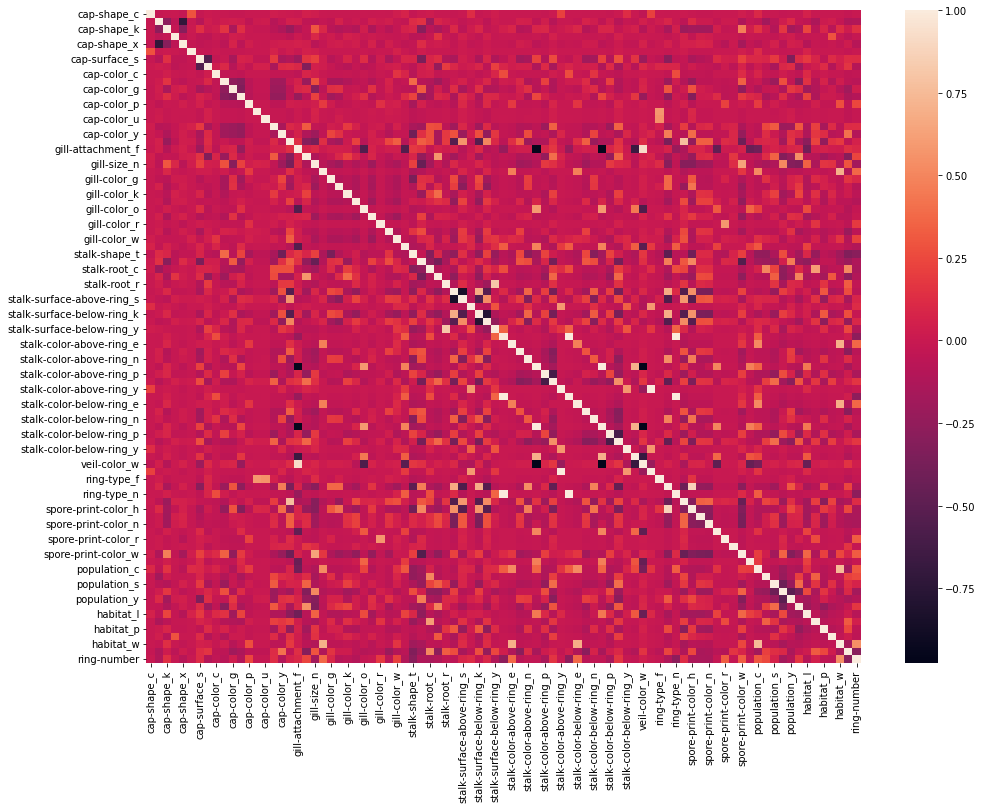

In [226]:
plt.figure(figsize=(16,12))
sns.heatmap(X_train_enc.corr(),annot=False)

In [227]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [236]:
corr_features = correlation(X_train_enc, 0.95)
len(set(corr_features))

4

In [237]:
corr_features

{'ring-type_n',
 'stalk-color-below-ring_c',
 'stalk-color-below-ring_o',
 'veil-color_y'}

In [260]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X_train_pca_data,Y_train)

ExtraTreesClassifier()

In [261]:
print(model.feature_importances_)

[0.28259856 0.10921648 0.07481499 0.09842848 0.01129537 0.03579146
 0.02973456 0.01570762 0.06608651 0.021788   0.01159595 0.01185147
 0.01204448 0.00959965 0.00658306 0.01072079 0.0251329  0.01363152
 0.01883083 0.01192134 0.013916   0.00997929 0.00855673 0.00899007
 0.01047748 0.01280837 0.01862589 0.01729196 0.01018346 0.01179673]


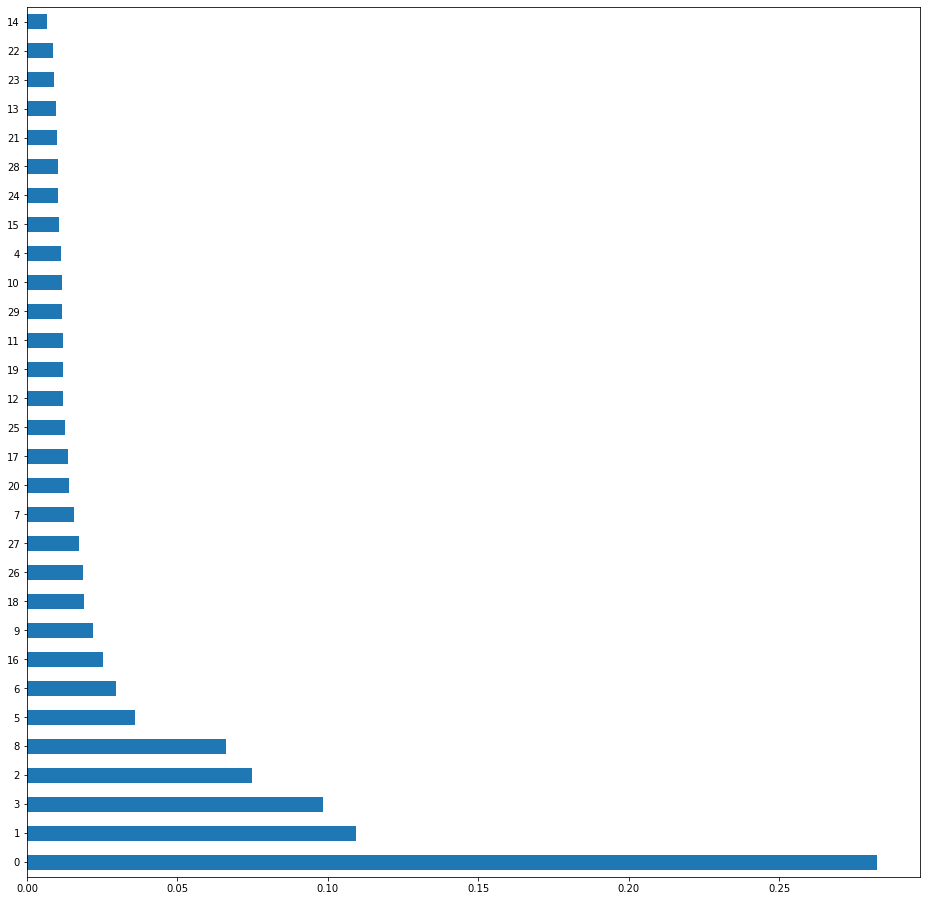

In [263]:
plt.figure(figsize=(16,16))
ranked_features=pd.Series(model.feature_importances_,index=X_train_pca_data.columns)
ranked_features.nlargest(50).plot(kind='barh')
plt.show()

## Applying PCA

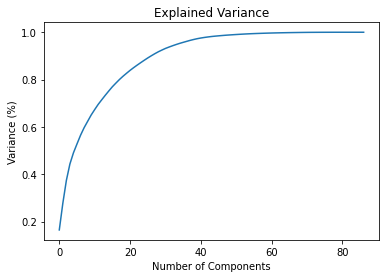

In [253]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(X_train_enc)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [247]:
principalComponents.shape

(6499, 87)

In [257]:
pca = PCA(n_components=30)
X_train_enc_pca = pca.fit_transform(X_train_enc)
X_train_pca_data = pd.DataFrame(data = X_train_enc_pca)
X_test_enc_pca = pca.transform(X_test_enc)
X_test_pca_data = pd.DataFrame(data = X_test_enc_pca)

In [259]:
X_test_pca_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,-1.270946,0.161513,-0.549273,0.822214,-0.303723,-0.015872,-0.905995,0.571737,0.421347,-0.940014,0.003840,0.380908,0.786528,-0.110480,0.514592,0.540194,0.547070,-0.255489,0.388787,0.143941,0.532333,0.070180,-0.099536,-0.158623,-0.752148,0.419330,-0.104670,-0.048417,0.056604,-0.330834
1,-0.783525,-1.688779,1.204641,-0.380170,0.595756,0.040729,-0.379349,-0.282259,0.677073,-0.051101,0.067862,0.258016,0.733707,0.041479,0.220245,0.255059,-0.441778,-0.501332,0.024183,-0.072907,-0.276627,-0.182677,-0.248468,-0.154769,-0.105172,-0.593489,0.200723,-0.402299,0.110455,-0.647362
2,-0.944294,-0.225698,-0.982110,2.169595,-0.173891,0.200210,-0.444536,0.186335,-0.583701,0.496641,-0.042184,-0.485804,0.018773,-0.126266,-0.095808,0.196592,-0.077477,-0.125168,-0.448093,-0.192507,-0.810118,-0.087417,-0.470483,0.054161,0.095602,0.097108,-0.292941,0.802718,0.104265,-0.523629
3,-1.262498,0.519489,-1.165070,-1.245871,-0.687761,-0.332809,-0.274422,0.066930,0.748463,0.124976,0.019654,-0.503522,-0.290294,-0.335745,0.198045,-0.034252,0.471472,0.096784,0.000921,-0.317676,-0.243203,-0.312786,-0.458676,-0.205693,0.443061,-0.162791,-0.064078,-0.173289,-0.350388,-0.107810
4,-0.916738,-0.543358,1.008317,-0.123114,-0.797222,-0.399641,0.261357,0.591905,-0.694075,-0.184161,-1.042492,0.359844,-0.051018,0.535142,0.667273,0.350492,0.133832,0.146296,-0.310774,0.043028,-0.076702,0.004937,0.004708,0.013392,-0.043353,0.148355,-0.052892,0.376287,0.021155,0.356144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620,-0.776507,-0.931147,1.573127,-0.183184,0.619699,-0.072324,-0.191392,0.310843,0.387350,-0.988291,-0.101391,-0.106723,-0.140422,0.324806,0.828714,0.296758,-0.354986,-0.218819,-0.284945,0.044588,-0.121272,-0.261653,-0.334691,-0.083300,-0.315902,-0.578264,0.167737,-0.402128,0.180912,-0.479907
1621,-0.817588,0.185652,-0.993436,-1.618731,0.684616,-0.459711,-0.595416,-0.162345,0.578897,-0.090036,0.006353,-0.416583,0.006920,-0.215343,0.759832,0.764573,0.094922,0.124393,-0.006178,0.054857,-0.192772,-0.179652,-0.212180,-0.303350,0.471366,-0.299646,0.078911,0.180827,-0.120859,0.337325
1622,0.950257,1.260931,0.803085,0.306535,0.750672,-0.387645,-0.664591,-0.522673,0.003105,0.322843,-0.980257,0.215384,0.285029,-0.185425,0.203286,-0.946093,0.308498,0.083926,-0.158839,0.256083,0.093814,-0.198354,-0.255647,0.277905,0.255536,-0.117601,0.061635,-0.125809,0.022623,-0.099845
1623,-1.131414,0.160092,-1.234205,1.717449,0.326283,0.119783,0.799735,-0.056784,0.975793,0.321425,0.039928,-0.401329,0.216035,0.025345,-0.224723,0.248392,-0.191315,0.413541,-0.293869,-0.393054,-0.339631,-0.411778,-0.941756,-0.212100,0.159290,-0.416051,-0.236455,0.358291,-0.334317,0.222939


## Models

Logistic Regression

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.tree import export_graphviz
from sklearn.metrics import precision_recall_curve, auc
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.ensemble import RandomForestClassifier as RF

In [81]:
 def apply_models():
    #Logistic Regression
    model_logistic = LR()
    model_logistic.fit(X_train,Y_train)

    #SVC
    model_SVC=SVC(random_state=42, gamma="auto", probability=True)
    model_SVC.fit(X_train,Y_train)

    #Decision Tree
    model_dt = DT(criterion='entropy',random_state=42)
    model_dt.fit(X_train_pca,Y_train)

    #KNN
    model_knn = KNN()
    model_knn.fit(X_train,Y_train)

    #Naive Bayes
    model_nb = NB()
    model_nb.fit(X_train,Y_train)

    #Random Forest
    model_rf = RF(n_estimators = 50, criterion = 'entropy', random_state = 42)
    model_rf.fit(X_train, Y_train)

In [28]:
def print_result(X_train,Y_train,X_test,Y_test,model):
    print("TRAINING RESULTS:\n")
    print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(Y_train,model.predict(X_train))))
    print('Classification Report:\n{}\n'.format(classification_report(Y_train,model.predict(X_train))))
    print('Confusion Matrix:\n{}\n'.format(confusion_matrix(Y_train,model.predict(X_train))))
    res = cross_val_score(model, X_train, Y_train, cv=10, n_jobs=-1, scoring='accuracy')
    print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
    print('Standard Deviation:\t{0:.4f}'.format(res.std()))

    print("\n\n\nTEST RESULTS:\n")
    print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(Y_test,model.predict(X_test))))
    print('Classification Report:\n{}\n'.format(classification_report(Y_test,model.predict(X_test))))
    print('Confusion Matrix:\n{}\n'.format(confusion_matrix(Y_test,model.predict(X_test))))

In [29]:
model_logistic = LR()
model_logistic.fit(X_train_enc,Y_train)
print_result(X_train_enc,Y_train,X_test_enc,Y_test,model_logistic)

TRAINING RESULTS:

Accuracy Score: 0.9995

Classification Report:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      3356
           p       1.00      1.00      1.00      3143

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499


Confusion Matrix:
[[3356    0]
 [   3 3140]]

Average Accuracy:	0.9995

Standard Deviation:	0.0007



TEST RESULTS:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       852
           p       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625


Confusion Matrix:
[[852   0]
 [  0 773]]



In [304]:
X_test_enc.columns.shape

(87,)

## Pickle model

In [30]:
import pickle
filename = 'model.pkl'
pickle.dump(model_logistic, open(filename, 'wb'))

In [31]:
loaded_model = pickle.load(open(filename, 'rb'))
pred=loaded_model.predict(X_test_enc)

In [32]:
pred

array(['p', 'e', 'e', ..., 'p', 'e', 'e'], dtype=object)

In [33]:
X_test_enc.shape

(1625, 87)

## Pickle transformations

In [37]:
X_train

,cap-shape,cap-surface,cap-color,bruises,pleasant_odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7434,k,s,g,f,2,f,w,b,p,e,m,s,s,w,w,w,2,p,w,s,g
7725,x,f,w,f,2,f,w,b,g,e,m,s,s,w,w,w,2,p,w,n,g
783,x,s,w,t,1,f,c,b,n,e,c,s,s,w,w,w,1,p,k,s,m
1928,f,s,w,f,2,f,w,b,h,t,e,s,f,w,w,w,1,e,k,s,g
7466,k,y,e,f,0,f,c,n,b,t,m,s,k,w,p,w,1,e,w,v,l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,x,y,e,t,2,f,c,b,e,e,m,s,s,e,e,w,2,e,w,c,w
3264,x,f,g,f,0,f,c,b,h,e,b,k,k,p,n,w,1,l,h,y,p
1653,x,s,g,f,2,f,w,b,h,t,e,f,s,w,w,w,1,e,n,s,g
2607,f,f,n,t,2,f,c,b,n,t,b,s,s,g,g,w,1,p,n,v,d


In [38]:
name = 'encoding.pkl'

In [39]:
pickle.dump(enc,open(name,'wb'))

In [34]:
val = np.array(['b', 'f' ,'n' ,'t', 'a', 'a' ,'c', 'b', 'k', 'e', 'b' ,'f', 'f', 'n' ,'n' ,'p' ,'n', 'o','c', 'k', 'a', 'g'])
type(val)

numpy.ndarray

In [35]:
input = np.array(val).reshape(1,-1)
input

array([['b', 'f', 'n', 't', 'a', 'a', 'c', 'b', 'k', 'e', 'b', 'f', 'f',
        'n', 'n', 'p', 'n', 'o', 'c', 'k', 'a', 'g']], dtype='<U1')

In [36]:
print(input)
input = np.delete(input,15)
print(input)  

    
if input[16] =='n':
    input[16] = 0
elif input[16] == 'o':
    input[16] = 1
else:
    input[16] = 2

print(input)  

if ((input[4] =='a')|(input[4] =='l')):
    input[4] = 1
elif input[4] == 'n':
    input[4] = 2
else:
    input[4] = 0

print(input)  

odor = input[4]
ring = input[16]
input = np.delete(input,4)    
input = np.delete(input,15)
print(input)    

[['b' 'f' 'n' 't' 'a' 'a' 'c' 'b' 'k' 'e' 'b' 'f' 'f' 'n' 'n' 'p' 'n' 'o'
  'c' 'k' 'a' 'g']]
['b' 'f' 'n' 't' 'a' 'a' 'c' 'b' 'k' 'e' 'b' 'f' 'f' 'n' 'n' 'n' 'o' 'c'
 'k' 'a' 'g']
['b' 'f' 'n' 't' 'a' 'a' 'c' 'b' 'k' 'e' 'b' 'f' 'f' 'n' 'n' 'n' '1' 'c'
 'k' 'a' 'g']
['b' 'f' 'n' 't' '1' 'a' 'c' 'b' 'k' 'e' 'b' 'f' 'f' 'n' 'n' 'n' '1' 'c'
 'k' 'a' 'g']
['b' 'f' 'n' 't' 'a' 'c' 'b' 'k' 'e' 'b' 'f' 'f' 'n' 'n' 'n' 'c' 'k' 'a'
 'g']


In [37]:
type(input)

numpy.ndarray

In [38]:
enc1=pickle.load(open('encoding.pkl','rb'))

In [39]:
final_input=enc1.transform(np.array(input).reshape(1,-1)).toarray()
final_input

D:\Machine Learning\Internship\Mushroom Classification\Mushroom-Classification\myenv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
D:\Machine Learning\Internship\Mushroom Classification\Mushroom-Classification\myenv\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [15] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0.]])

In [48]:
final_input = [float(x) for x in final_input[0]]

In [41]:
final_input=np.append(final_input,[odor])
final_input=np.append(final_input,[ring])
final_input=final_input.reshape(1,-1)

In [49]:
type(final_input[0])

float

In [43]:
model = pickle.load(open('model.pkl','rb'))

In [51]:
pred=loaded_model.predict([final_input])
#final_input = list(map(int,final_input))

D:\Machine Learning\Internship\Mushroom Classification\Mushroom-Classification\myenv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [52]:
pred

array(['e'], dtype=object)